In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('d1.csv')
df2 = pd.read_csv('d2.csv')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1500 non-null   float64
 1   y       1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


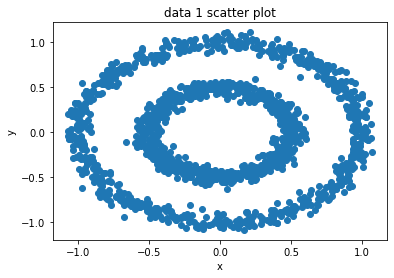

In [48]:
x , y = df1['x'] , df1['y']
plt.scatter(x,y)
plt.title('data 1 scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

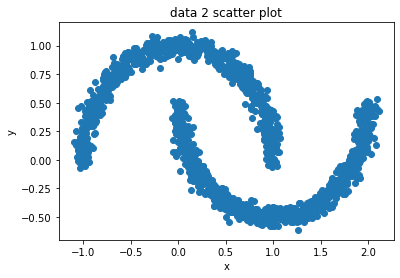

In [14]:
x , y = df2['x'] , df2['y']
plt.scatter(x,y)
plt.title('data 2 scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


clusterer = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_pred = clusterer.fit_predict(df1)


{0, 1}

In [81]:

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def range_query(data, point, epsilon):
    distances = np.apply_along_axis(lambda x: euclidean_distance(point, x), axis=1, arr=data)
    return np.where(distances <= epsilon)[0]

def dbscan(data, epsilon = 0.1, min_samples=5):
    labels = np.zeros(len(data))
    cluster_id = 0

    for i in range(len(data)):
        if labels[i] != 0:
            continue

        neighbors = range_query(data, data[i], epsilon)

        if len(neighbors) < min_samples:
            labels[i] = -1  # Mark as noise
        else:
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, epsilon, min_samples)

    return labels

def expand_cluster(data, labels, current_point, neighbors, cluster_id, epsilon, min_samples):
    labels[current_point] = cluster_id

    i = 0
    while i < len(neighbors):
        current_neighbor = neighbors[i]

        if labels[current_neighbor] == -1:
            labels[current_neighbor] = cluster_id
        elif labels[current_neighbor] == 0:
            labels[current_neighbor] = cluster_id
            current_neighbor_neighbors = range_query(data, data[current_neighbor], epsilon)

            if len(current_neighbor_neighbors) >= min_samples:
                neighbors = np.concatenate((neighbors, current_neighbor_neighbors))

        i += 1

{1.0, 2.0, -1.0}


In [ ]:
def dbscan_plot(X, labels):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    plt.scatter(X[:,0], X[:,1],c=labels, cmap='Paired')
    plt.title("DBSCAN")
    


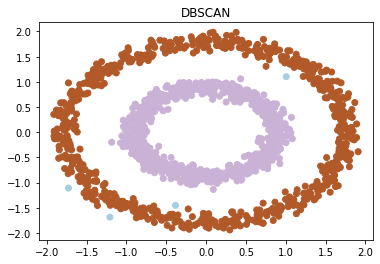

In [83]:
result_labels = dbscan(df1.values)
dbscan_plot(df1,result_labels)



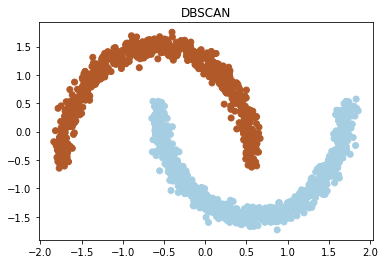

In [84]:
result_labels = dbscan(df2.values)
dbscan_plot(df2,result_labels)
